# Doğrusal Regresyon Egzersizleri

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups = pd.read_csv('../input/50-startups/50_Startups.csv')
df = startups.copy()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

Eksik verileri kontrol edelim.

In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Korelasyon matrisi çizdirelim.

In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

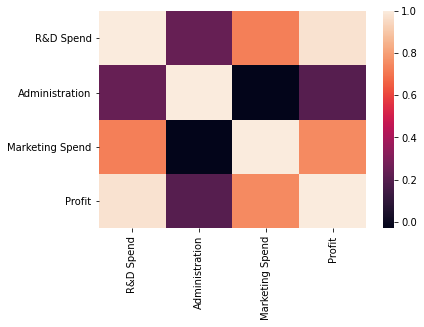

In [8]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

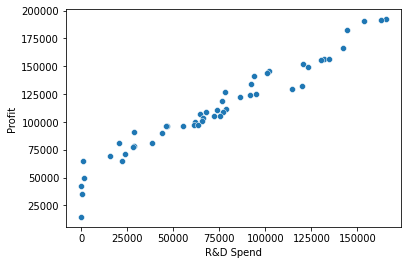

In [9]:
sns.scatterplot(x = "R&D Spend", y = "Profit", data = df);

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


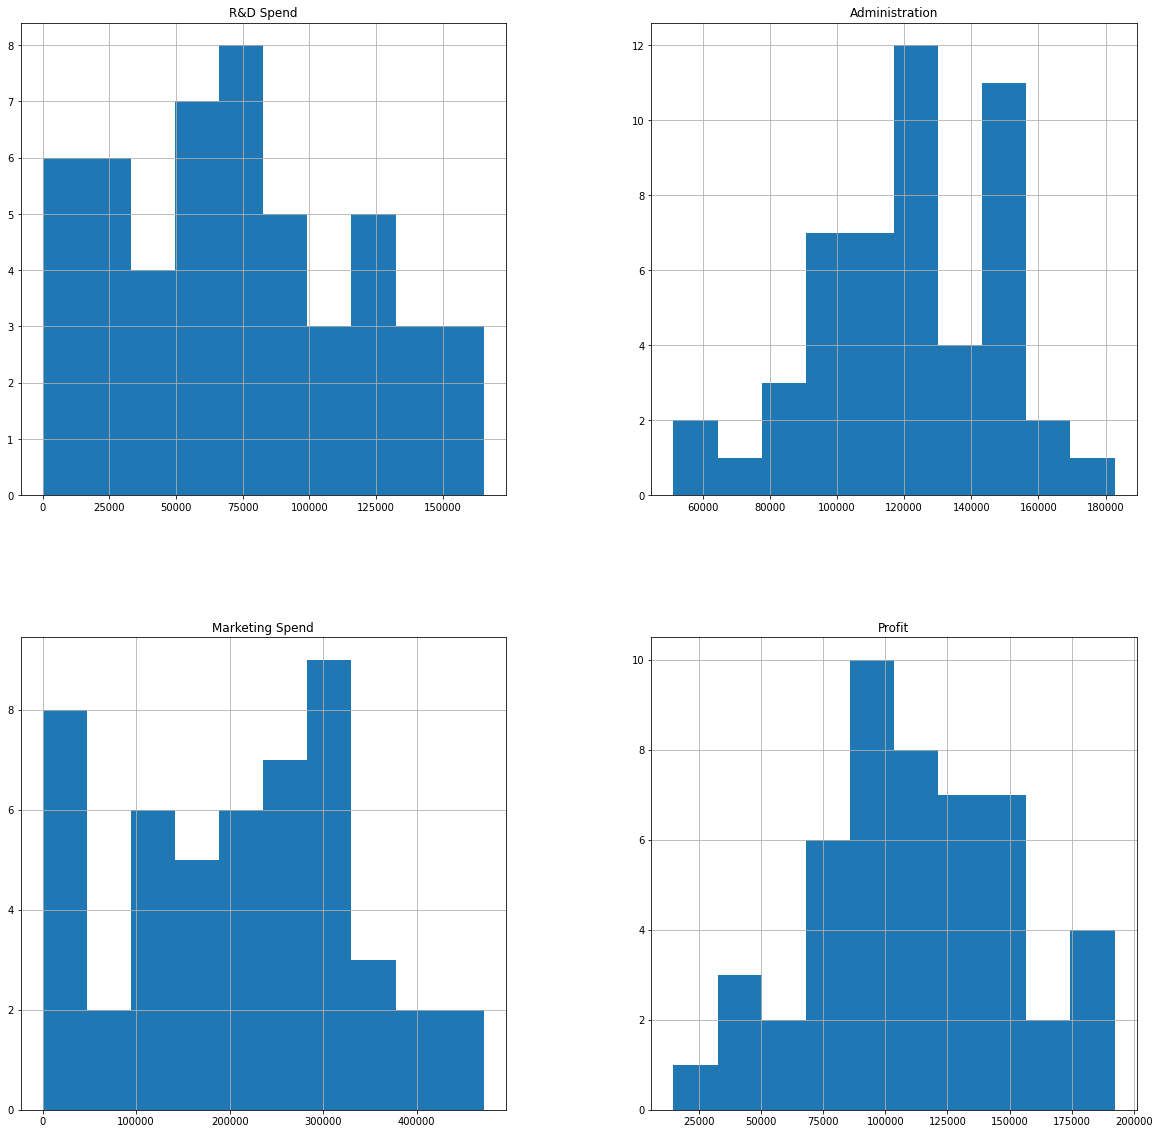

In [10]:
df.hist(figsize = (20,20))

plt.show()

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


State'a ait benzersiz değerleri görüntüleyelim.

In [12]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [13]:
df_State=pd.get_dummies(df["State"], prefix="-", prefix_sep='State-', dummy_na=False, columns=None,dtype=None)

In [14]:
df_State


,-State-California,-State-Florida,-State-New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [15]:
df.drop(["State"], axis=1 , inplace =True)
df=pd.concat([df,df_State],axis=1)
df.head()


,R&D Spend,Administration,Marketing Spend,Profit,-State-California,-State-Florida,-State-New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [16]:
df.drop(["-State-Florida"], axis=1, inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,-State-California,-State-New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [17]:
x = df.drop("Profit", axis = 1)
y = df["Profit"]

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [18]:
x.head()

,R&D Spend,Administration,Marketing Spend,-State-California,-State-New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [19]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)


4 parça değişkeni kontrol edelim.

In [21]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,-State-California,-State-New York
12,93863.75,127320.38,249839.44,0,0
4,142107.34,91391.77,366168.42,0,0
37,44069.95,51283.14,197029.42,1,0
8,120542.52,148718.95,311613.29,0,1
3,144372.41,118671.85,383199.62,0,1


In [22]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,-State-California,-State-New York
13,91992.39,135495.07,252664.93,1,0
39,38558.51,82982.09,174999.30,1,0
30,61994.48,115641.28,91131.24,0,0
45,1000.23,124153.04,1903.93,0,1
17,94657.16,145077.58,282574.31,0,1


In [23]:
y_train.head()

12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [24]:
 y_test.head()

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
Name: Profit, dtype: float64

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [26]:
lm.fit(x_train, y_train)


LinearRegression()

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [27]:
y_pred = lm.predict(x_test)
y_pred

array([126362.87908253,  84608.4538364 ,  99677.49425152,  46357.46068582,
       128750.482885  ,  50912.41741896, 109741.35032701, 100643.24281645,
        97599.27574598, 113097.42524435])

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [28]:
test= pd.DataFrame({"Gerçek-Değer" : y_test, "Tahminler" : y_pred,"Residual":abs(y_pred-y_test)})

test

,Gerçek-Değer,Tahminler,Residual
13,134307.35,126362.879083,7944.470917
39,81005.76,84608.453836,3602.693836
30,99937.59,99677.494252,260.095748
45,64926.08,46357.460686,18568.619314
17,125370.37,128750.482885,3380.112885
48,35673.41,50912.417419,15239.007419
26,105733.54,109741.350327,4007.810327
25,107404.34,100643.242816,6761.097184
32,97427.84,97599.275746,171.435746
19,122776.86,113097.425244,9679.434756


sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

In [29]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE

6961.47781326698

In [30]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
MSE

82010363.04474993

In [31]:
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

9055.957323483251

Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

In [32]:
lm.score(x_train,y_train)

0.9537019995248526

Dileyenler statsmodel kullanarak hangi özniteliklerin model için %95 güvenilirlikle ne kadar anlamlı olup olmadığına da bakabilir. Modelde bazı feature selection işlemleri yaparak tekrardan eğitip yeni sonuçlar mukayese edilebilir.

In [33]:
import statsmodels.api as sm


In [34]:
statsmodel = sm.OLS(y, x).fit()

In [35]:
statsmodel.summary() 
#Adj. R-squared.Modelin uyumunu yansıtır. R kare değerleri 0 ile 1 arasındadır; burada daha yüksek bir değer, belirli koşulların karşılandığı varsayılarak genellikle daha iyi bir uyumu gösterir.
#std err,katsayıların doğruluk düzeyini yansıtır. Ne kadar düşükse, doğruluk seviyesi o kadar yüksek olur,
#P> | t | senin olan p-değeri . 0.05'ten küçük bir p değeri istatistiksel olarak anlamlı kabul edilir.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              765.9
Date:                Sat, 29 May 2021   Prob (F-statistic):                    2.49e-42
Time:                        17:50:44   Log-Likelihood:                         -543.87
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      45   BIC:                                      1107.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
R&D Spend             0.7217      0.064     11.260      0.000       0.593       0.851
Administration        0.2847      0.038      7.465      0.000       0.208       0.362
Marketing Spend       0.0830      0.022      3.833      0.000       0.039       0.127
-State-California  7720.4710   4539.299      1.701      0.096   -1422.146    1.69e+04
-State-New York    7126.6916   4530.146      1.573      0.123   -1997.491    1.63e+04
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.929
Skew:                          -0.212   Prob(JB):                        0.628
Kurtosis:                       2.484   Cond. No.                     8.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""